In [ ]:
# Web App Link: https://kyash03-motionsenseml-webappmotiondata-dgmcfo.streamlit.app

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
info_df = pd.read_csv(
    '/Users/yashkumar/Jupyter/Projects/ML-Projects/Project7/data_subjects_info.csv'
)
info_df.drop('code', axis=1, inplace=True)

# Data Pre-Processing

In [3]:
final_df = pd.DataFrame(columns=[
    'attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
    'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y',
    'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
    'userAcceleration.z', 'weight', 'height', 'age', 'gender', 'activity'
])

In [4]:
folder_names = [
    'dws_1', 'dws_2', 'dws_11', 'jog_9', 'jog_16', 'sit_5', 'sit_13', 'std_6',
    'std_14', 'ups_3', 'ups_4', 'ups_12', 'wlk_7', 'wlk_8', 'wlk_15'
]
for folder_name in folder_names:
    for i in range(1, 25):
        current_df = pd.read_csv(
            '/Users/yashkumar/Jupyter/Projects/ML-Projects/Project7/A_DeviceMotion_data/'
            + folder_name + '/sub_' + str(i) + '.csv')
        info_df_row = info_df.iloc[i - 1]
        current_df[['weight', 'height', 'age', 'gender',
                    'activity']] = info_df_row[0], info_df_row[1], info_df_row[
                        2], info_df_row[3], folder_name[:3]
        final_df = pd.concat(
            [final_df, current_df.sample(frac=0.5, random_state=101)], axis=0)
final_df.reset_index(inplace=True, drop=True)
final_df.drop(final_df.columns[-1], axis=1, inplace=True)

In [5]:
final_df[['weight', 'height', 'age',
          'gender']] = final_df[['weight', 'height', 'age',
                                 'gender']].astype('int')

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706427 entries, 0 to 706426
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attitude.roll       706427 non-null  float64
 1   attitude.pitch      706427 non-null  float64
 2   attitude.yaw        706427 non-null  float64
 3   gravity.x           706427 non-null  float64
 4   gravity.y           706427 non-null  float64
 5   gravity.z           706427 non-null  float64
 6   rotationRate.x      706427 non-null  float64
 7   rotationRate.y      706427 non-null  float64
 8   rotationRate.z      706427 non-null  float64
 9   userAcceleration.x  706427 non-null  float64
 10  userAcceleration.y  706427 non-null  float64
 11  userAcceleration.z  706427 non-null  float64
 12  weight              706427 non-null  int64  
 13  height              706427 non-null  int64  
 14  age                 706427 non-null  int64  
 15  gender              706427 non-nul

In [7]:
final_df.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
weight                0
height                0
age                   0
gender                0
activity              0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

In [10]:
final_df['activity'] = label_encoder.fit_transform(final_df['activity'])

In [11]:
final_df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,weight,height,age,gender,activity
0,1.254690,-0.690710,-2.591591,0.732603,0.637085,-0.239615,0.386145,-3.653759,0.657364,0.112993,-0.210602,0.073660,102,188,46,1,0
1,1.452992,-0.880404,-2.395601,0.632426,0.770996,-0.074849,0.271995,0.355374,0.870675,0.443395,0.011993,-0.179180,102,188,46,1,0
2,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,102,188,46,1,0
3,1.305006,-0.395097,0.589506,0.890550,0.384897,-0.242435,0.731903,-4.297461,0.946982,-0.136140,0.320852,0.106022,102,188,46,1,0
4,1.188465,-0.403357,0.828289,0.853340,0.392509,-0.343144,0.153657,3.216770,-0.332676,-0.645561,-0.025580,-0.025768,102,188,46,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706422,0.645898,-1.023377,2.892396,0.313288,0.853871,-0.415638,-0.516028,1.422582,0.413438,-0.810252,0.337169,0.282902,74,173,18,0,5
706423,-1.144901,-1.251343,1.319990,-0.285993,0.949407,-0.129744,-0.219861,-2.690621,0.198625,0.568632,1.116724,-0.285051,74,173,18,0,5
706424,-1.260049,-1.183674,1.246309,-0.359444,0.925999,-0.115436,1.202966,0.644490,-0.173920,0.251274,-0.371846,1.540637,74,173,18,0,5
706425,-1.736760,-1.070045,0.803290,-0.473488,0.877222,0.079311,0.480043,-0.635591,0.106801,0.949669,-0.892664,-0.196606,74,173,18,0,5


# Data Visualization

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Mean of Sensor Measurements (Female)')

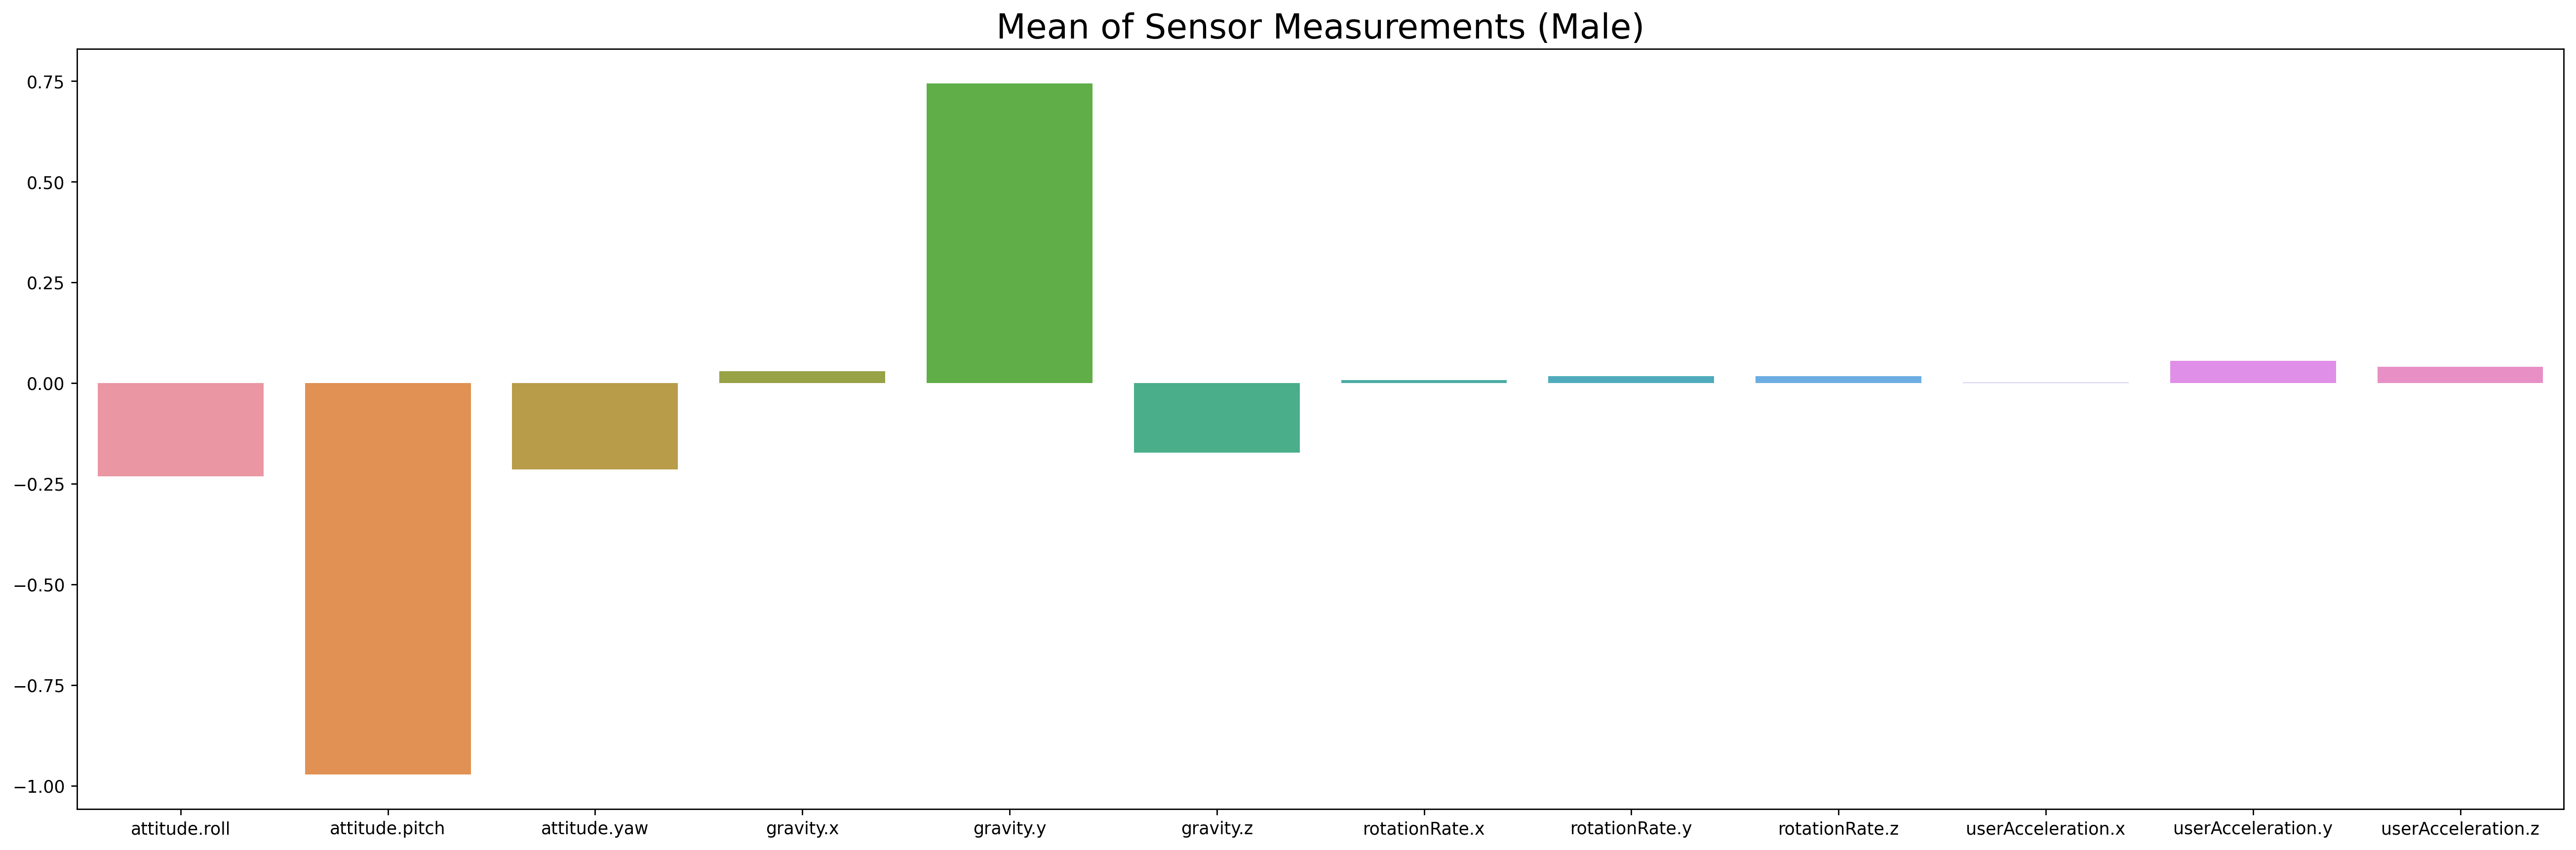

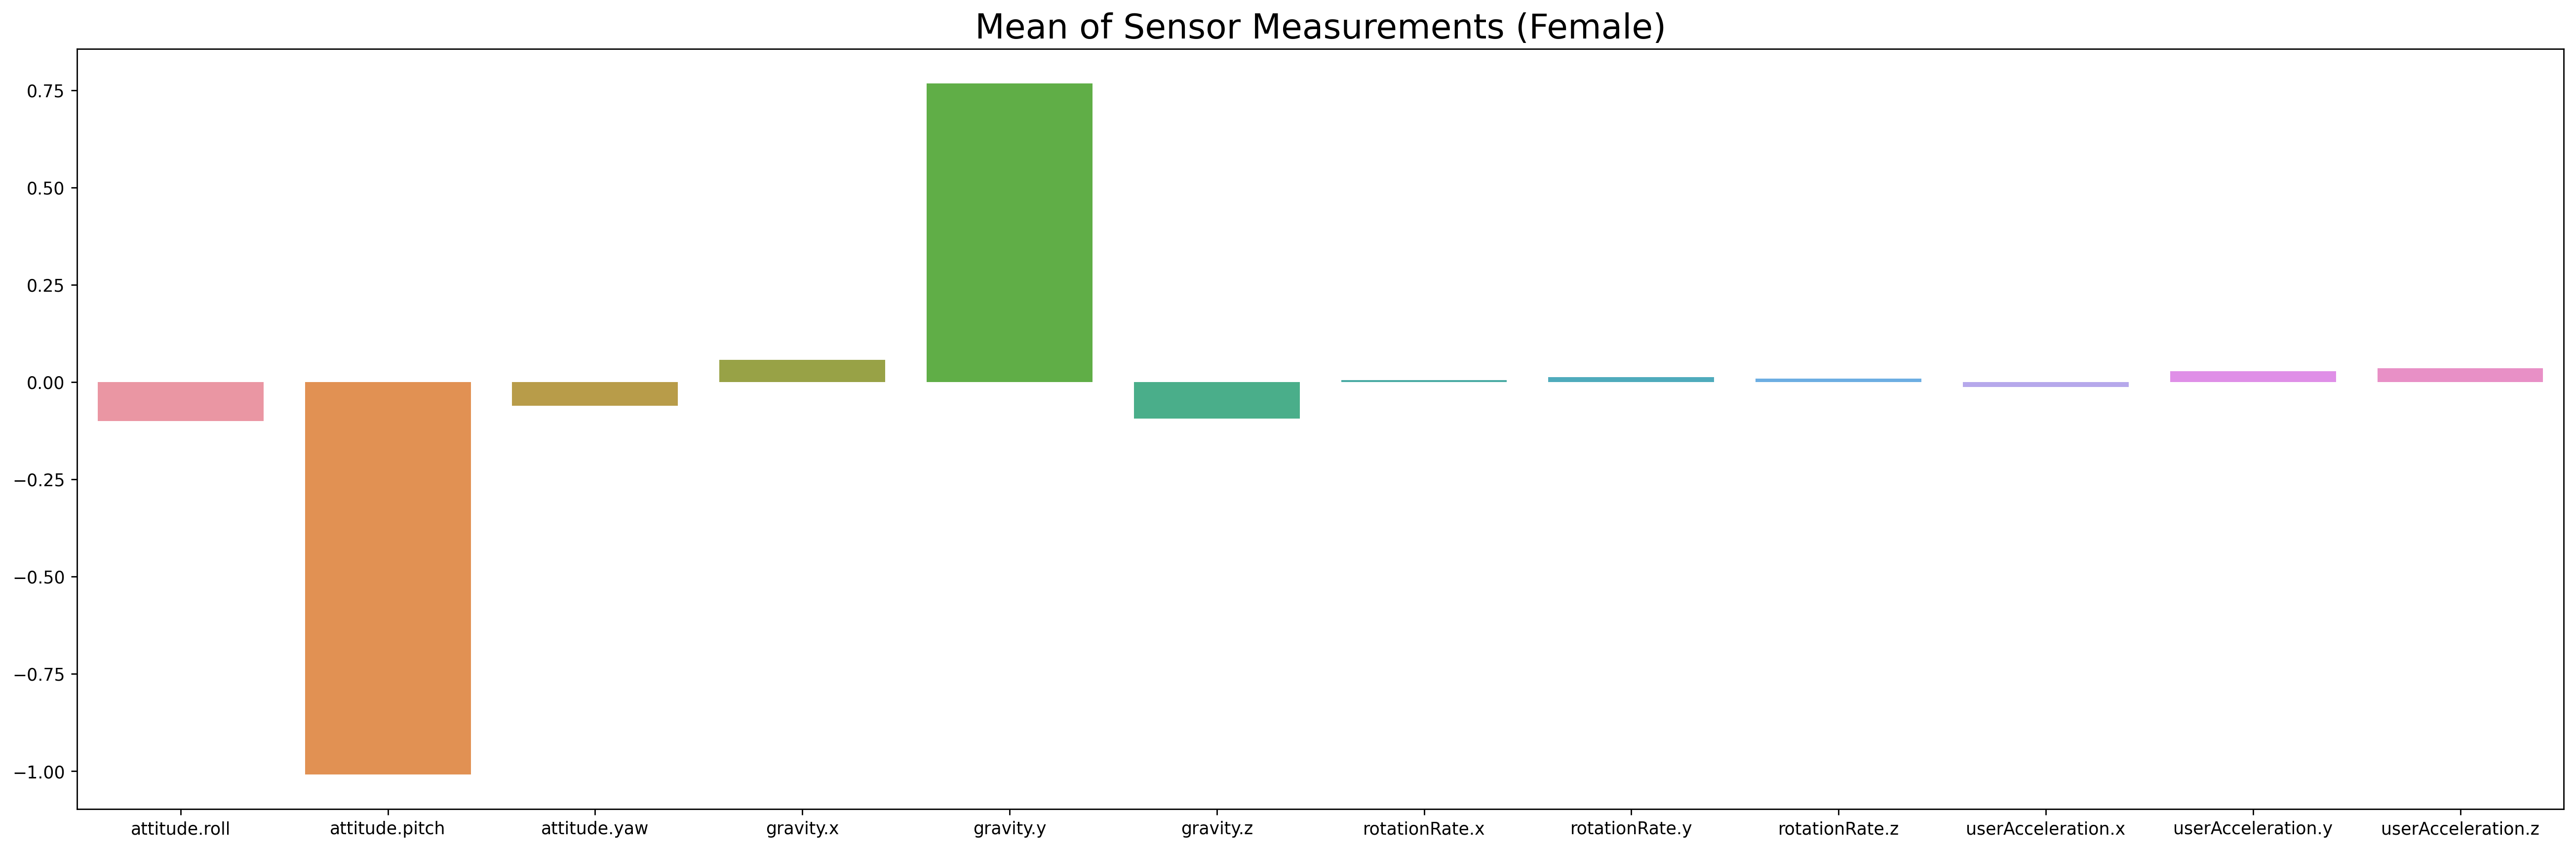

In [13]:
# Male
measurements_mean = [
    np.mean(final_df[final_df['gender'] == 1][measurement_name])
    for measurement_name in final_df.columns[:12]
]

plt.figure(figsize=(26, 8), dpi=250)
sns.barplot(x=final_df.columns[:12], y=measurements_mean)
plt.title('Mean of Sensor Measurements (Male)', fontsize=20)

# Female
measurements_mean = [
    np.mean(final_df[final_df['gender'] == 0][measurement_name])
    for measurement_name in final_df.columns[:12]
]

plt.figure(figsize=(26, 8), dpi=250)
sns.barplot(x=final_df.columns[:12], y=measurements_mean)
plt.title('Mean of Sensor Measurements (Female)', fontsize=20)

# The above piece of code plots the mean of sensor measurements for both genders.
# Although the mean measurements of the two genders are largely comparable, disparities in their distributions are nevertheless discernible.

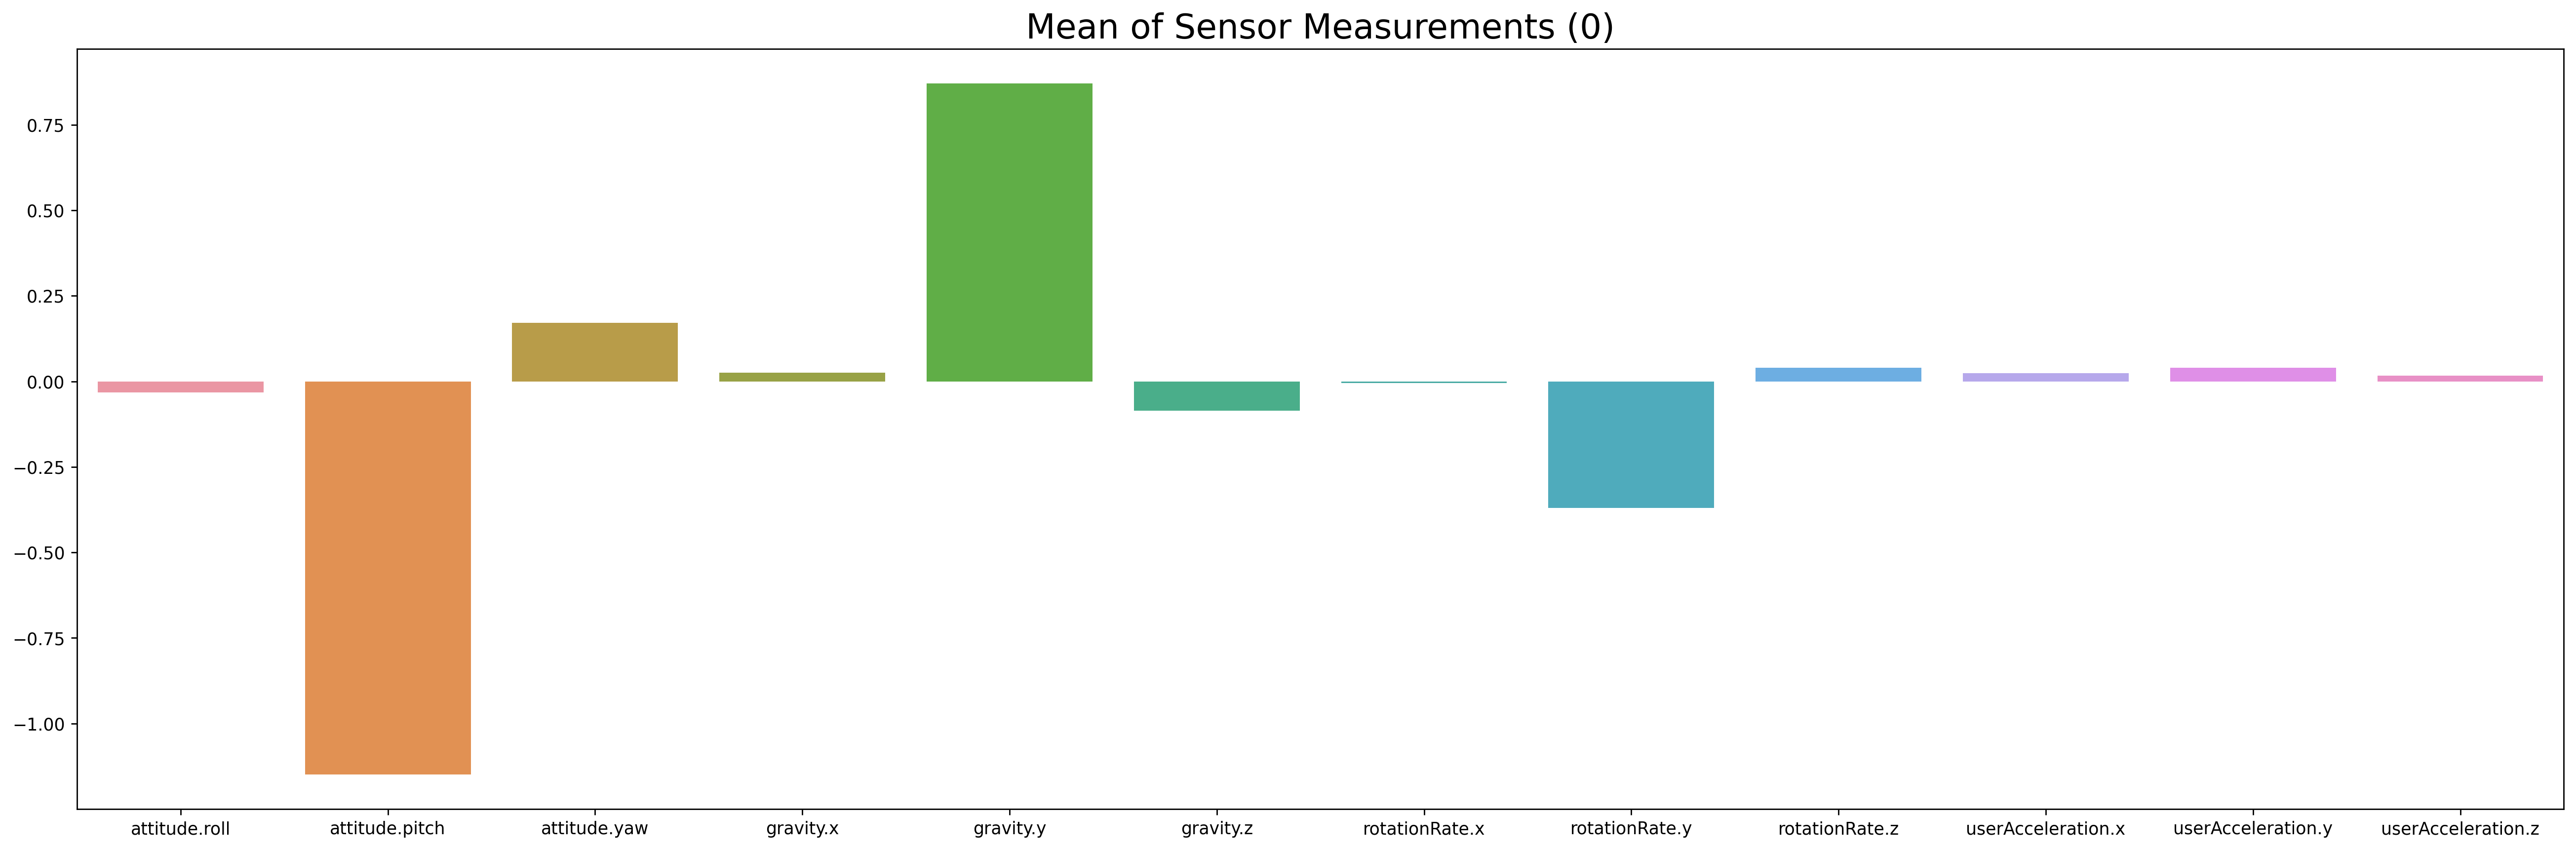

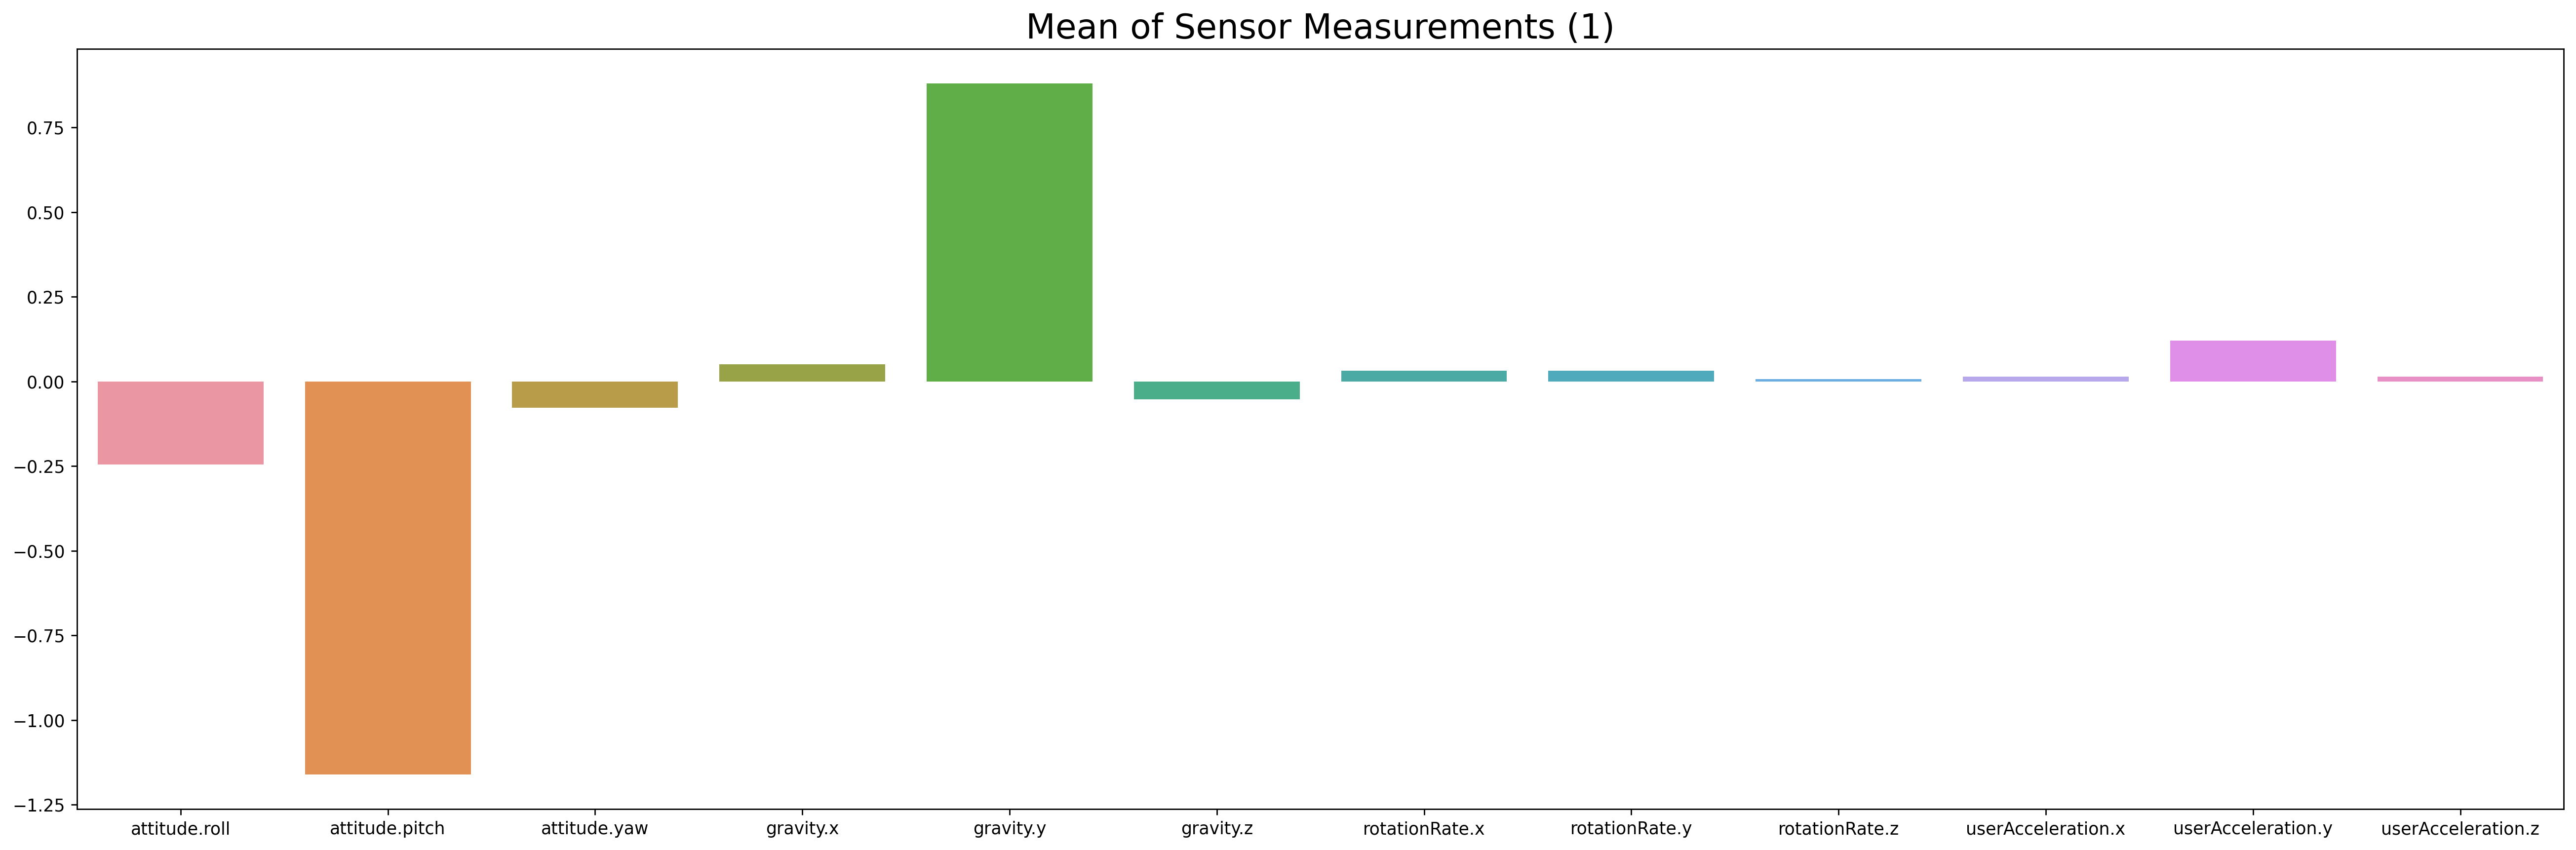

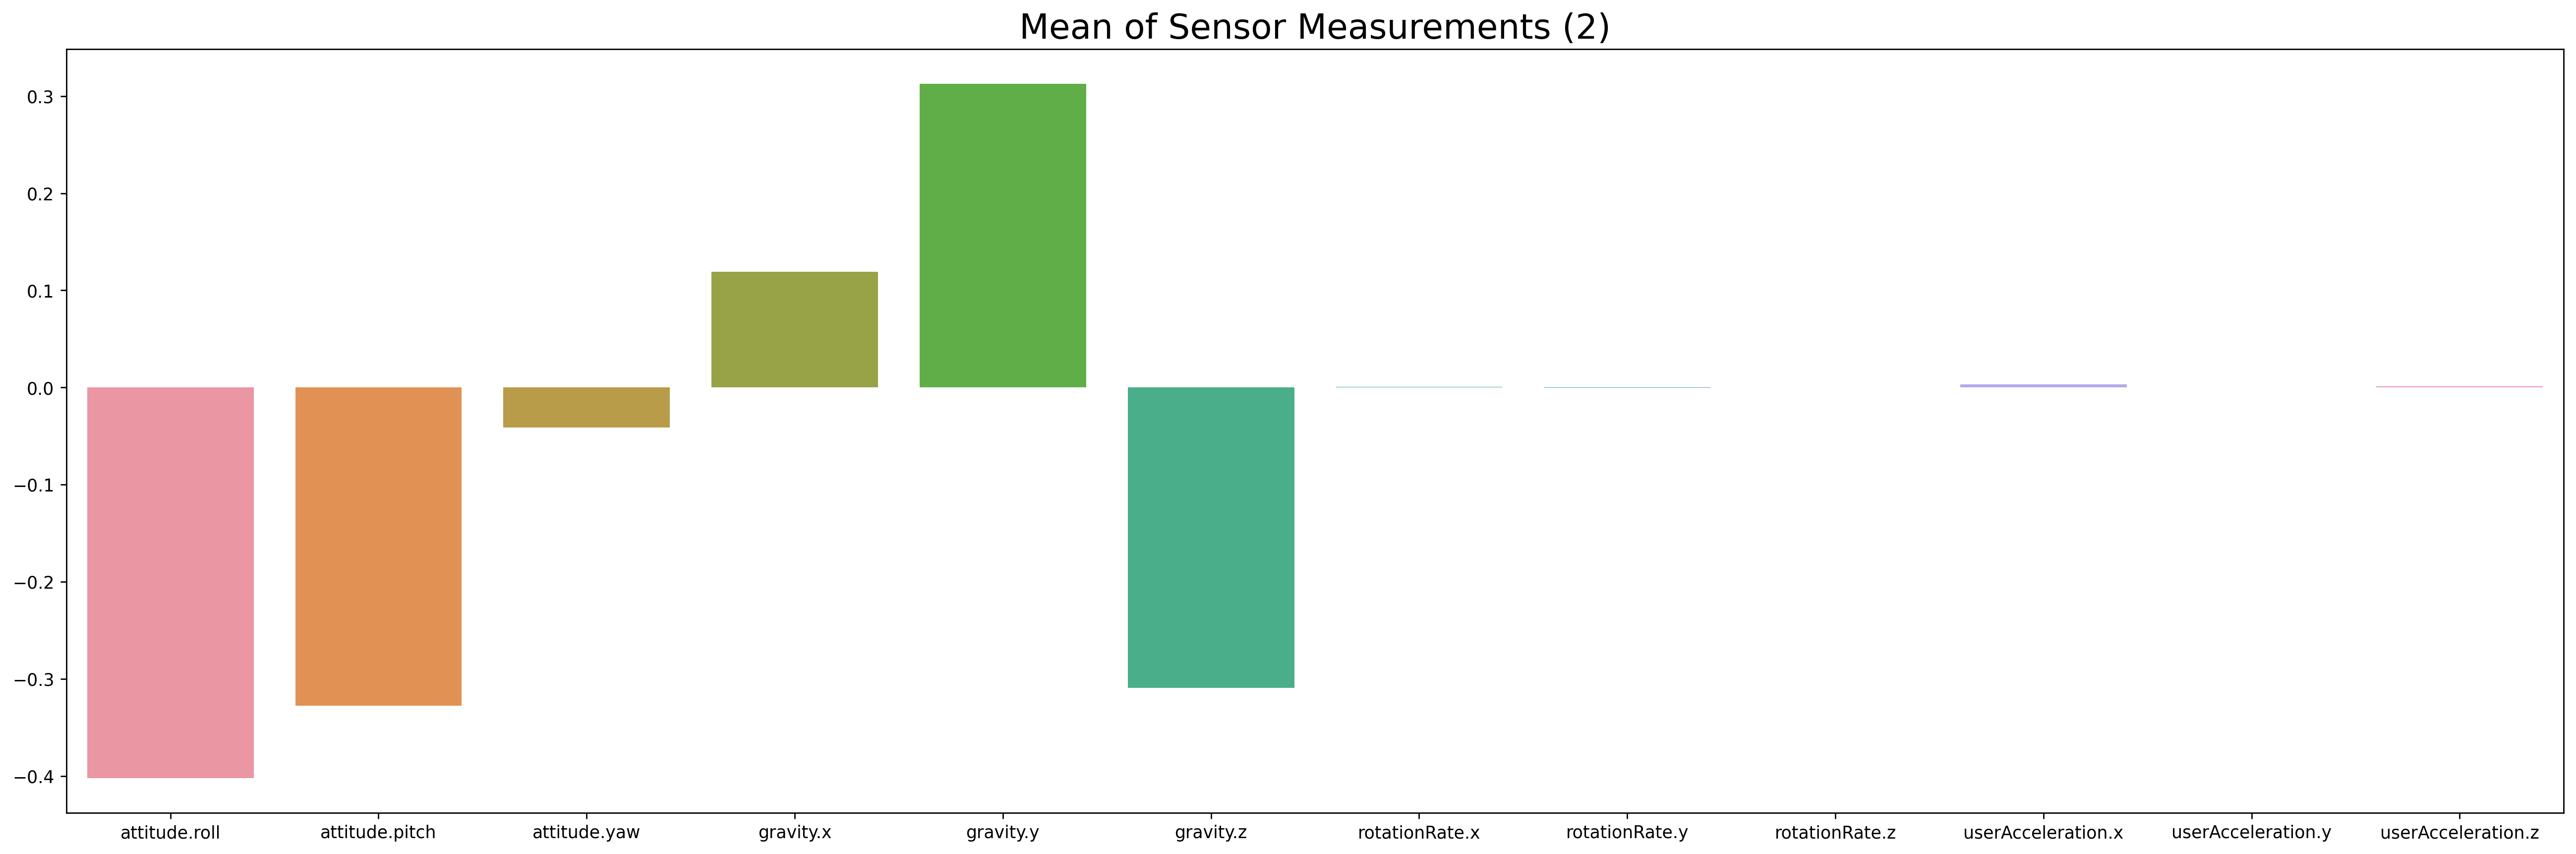

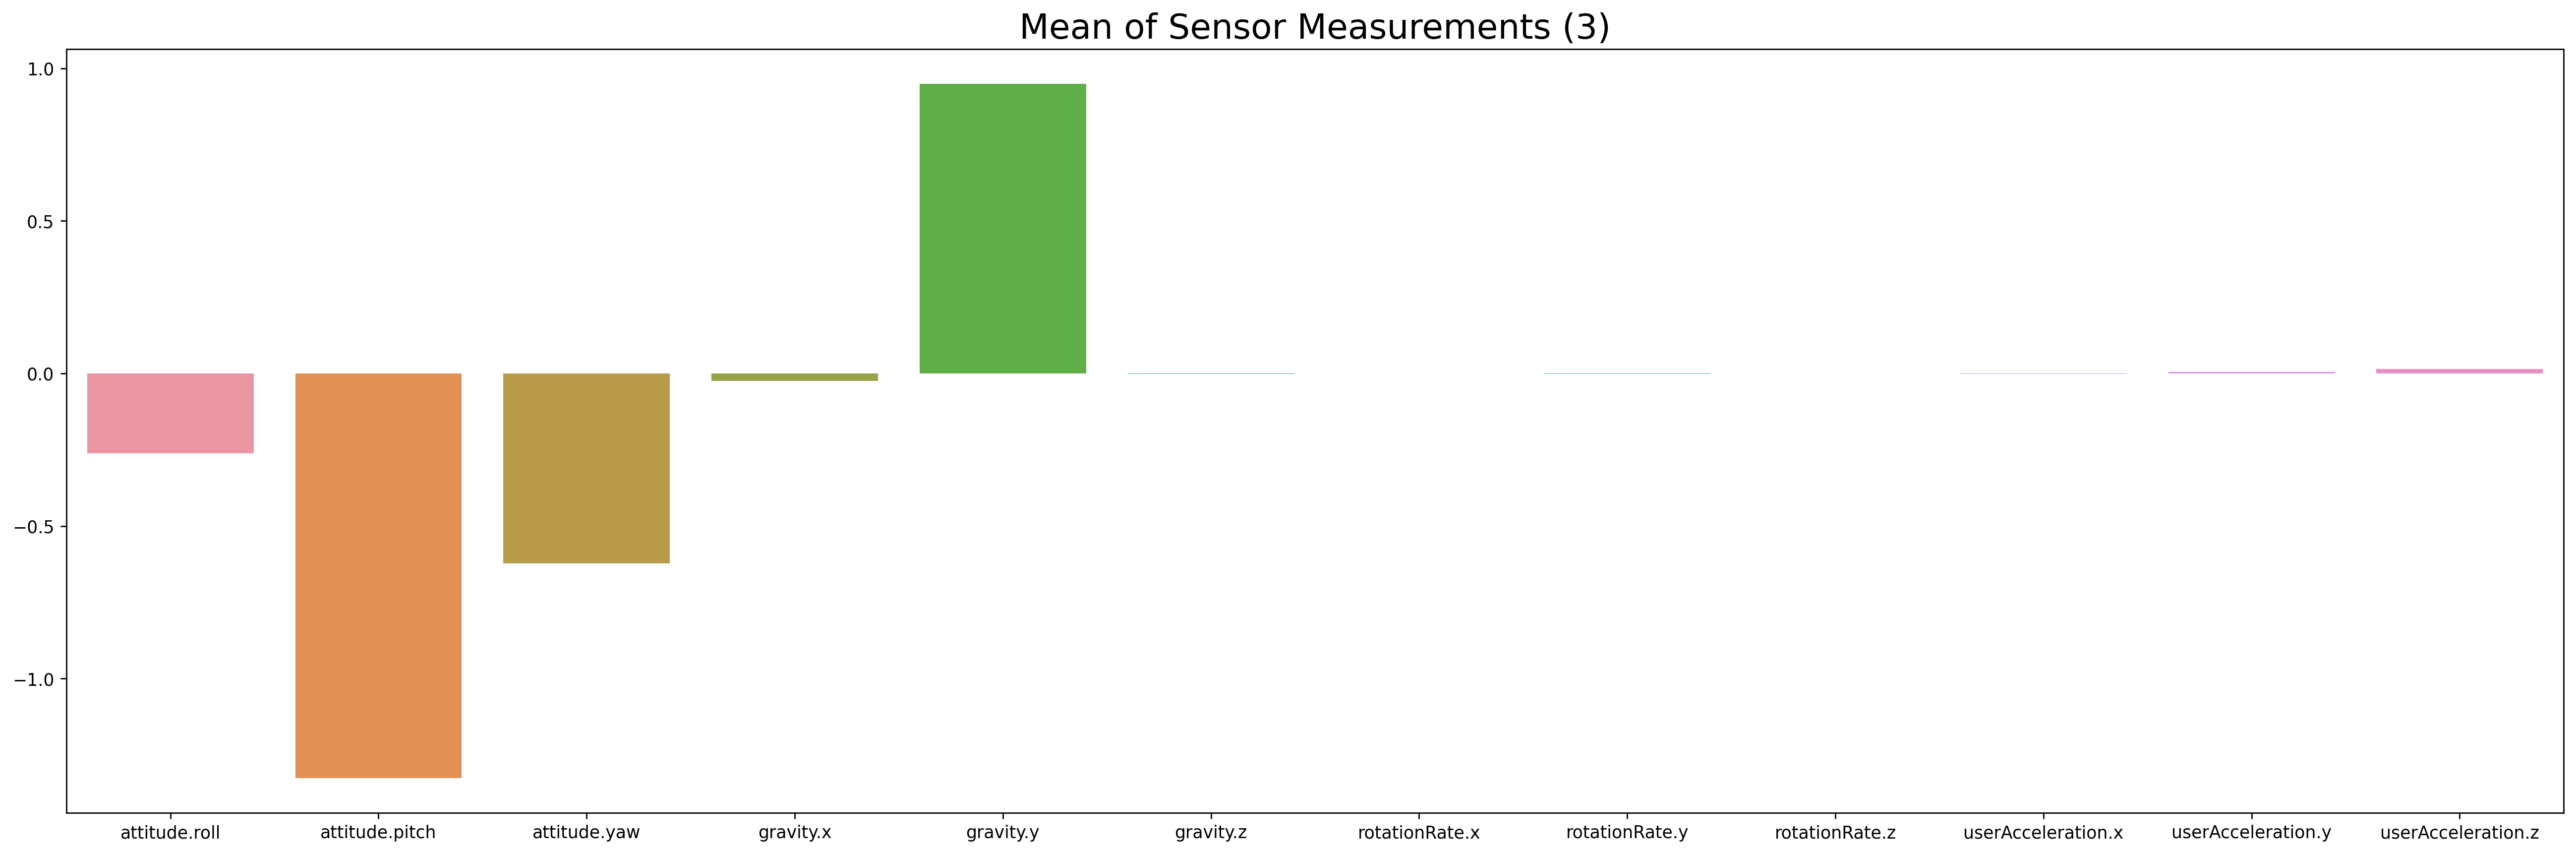

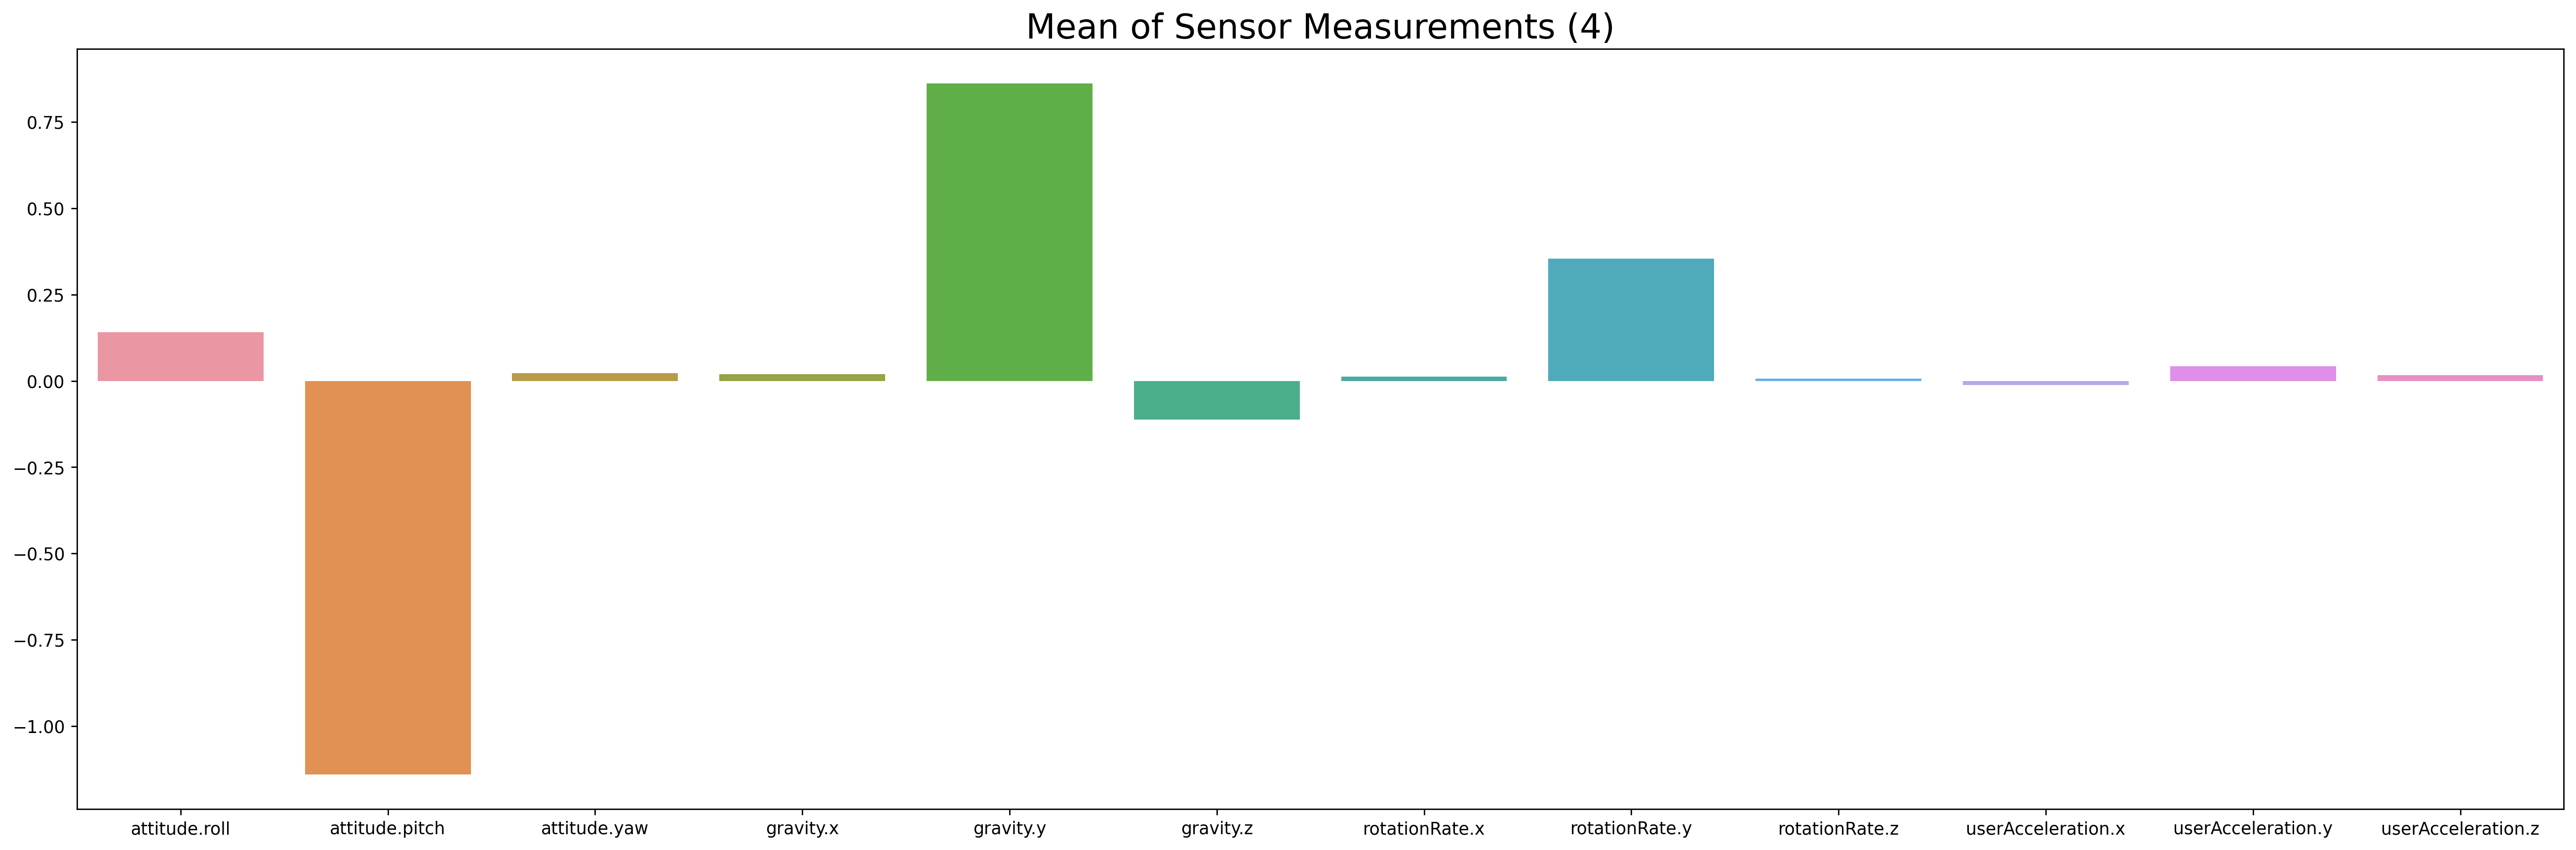

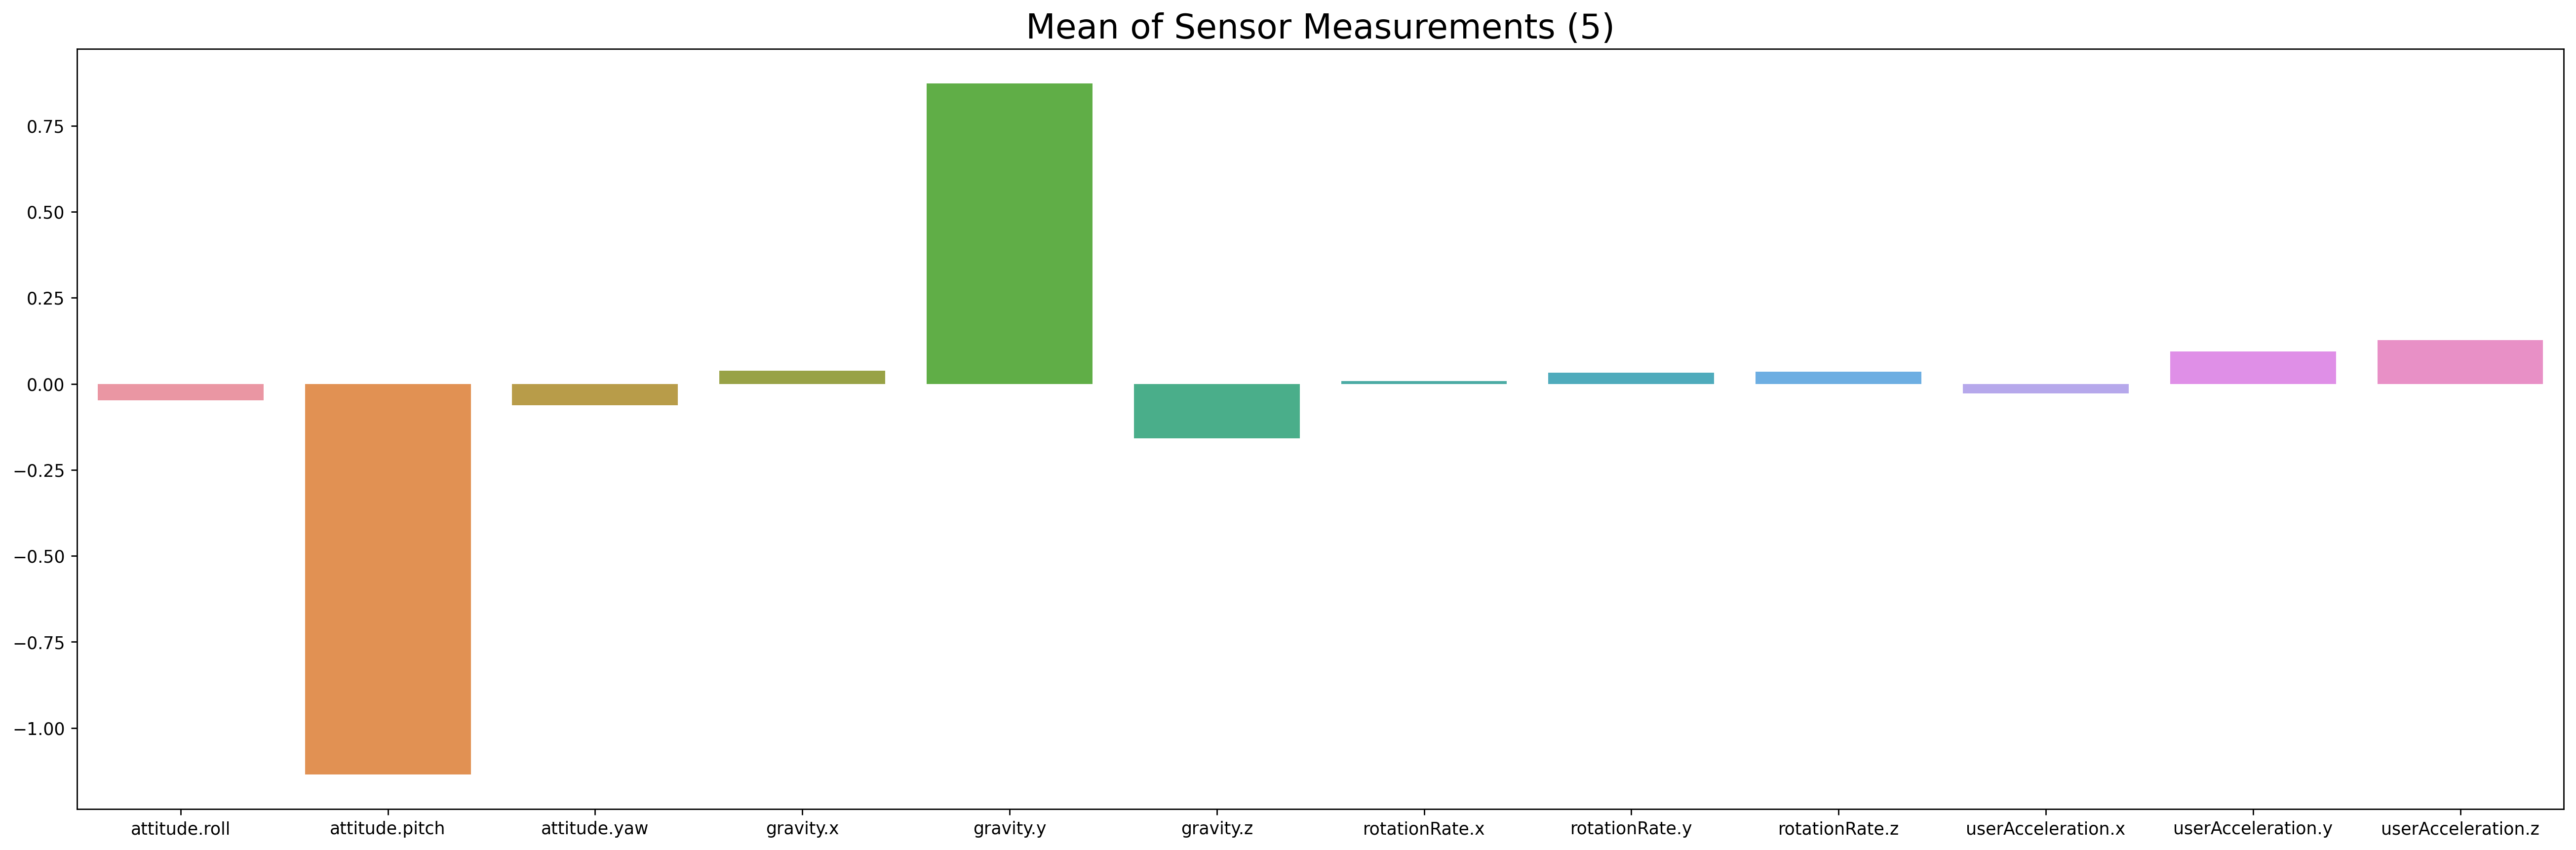

In [14]:
activity_names = final_df['activity'].unique()
for activity_name in activity_names:
    measurements_mean = [
        np.mean(
            final_df[final_df['activity'] == activity_name][measurement_name])
        for measurement_name in final_df.columns[:12]
    ]

    plt.figure(figsize=(26, 8), dpi=250)
    sns.barplot(x=final_df.columns[:12], y=measurements_mean)
    plt.title('Mean of Sensor Measurements (' + str(activity_name) + ')',
              fontsize=20)

<AxesSubplot:>

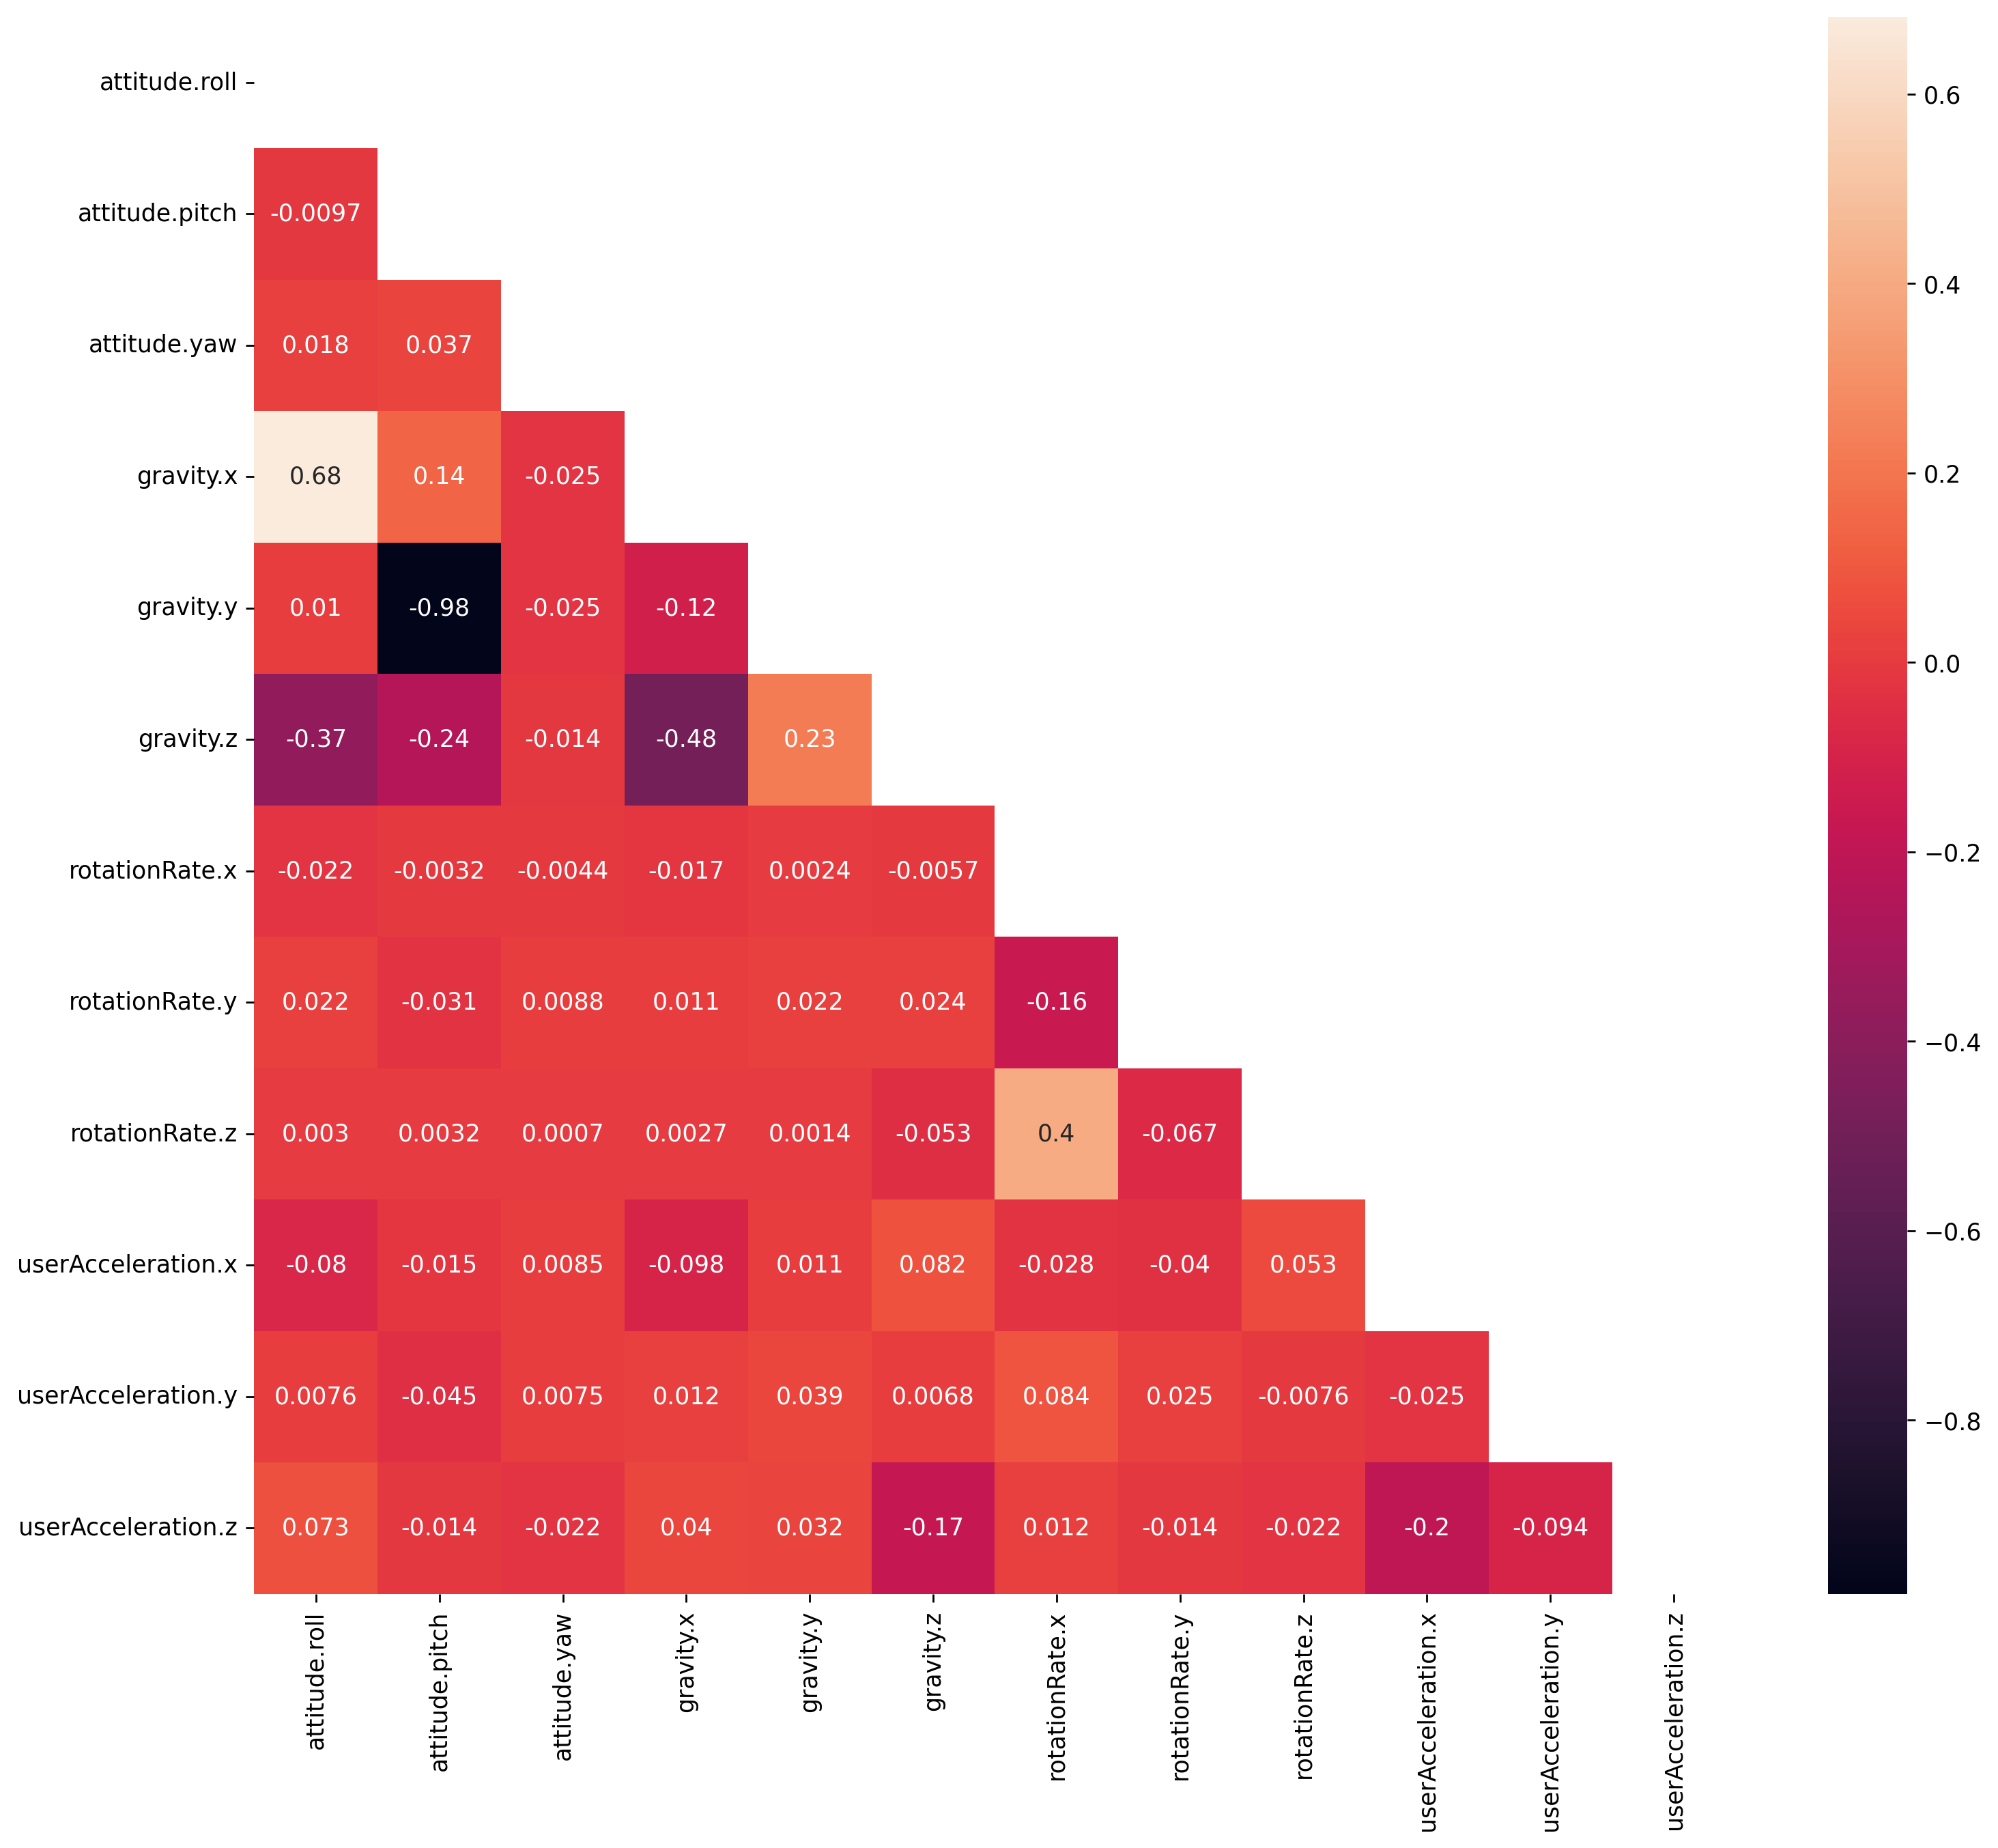

In [15]:
plt.figure(figsize=(14, 12), dpi=250)
corr_df = final_df.iloc[:, :12].corr()
upper_triangle = np.triu(corr_df)
sns.heatmap(corr_df, mask=upper_triangle, annot=True)

# Machine Learning - Weight, Height and Age

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [17]:
X = final_df.iloc[:, :12]
y = final_df.iloc[:, 12:15]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=101,
                                                    test_size=0.4)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

In [22]:
y_pred = pipe.predict(X_test)

In [23]:
r2_score(y_test, y_pred)

0.8212566043990126

#### The above figure shows that each feature is relatively important.

# Hyperparameter Tuning - Weight, Height and Age

In [24]:
pipe['model'].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [25]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_grid

{'n_neighbors': [1, 3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [26]:
base_model_random = GridSearchCV(estimator=KNeighborsRegressor(),
                                 param_grid=param_grid,
                                 scoring='r2',
                                 n_jobs=-1)

In [27]:
base_model_random.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [28]:
base_model_random.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [29]:
new_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model',
     KNeighborsRegressor(
         n_neighbors=base_model_random.best_params_['n_neighbors'],
         p=base_model_random.best_params_['p'],
         weights=base_model_random.best_params_['weights'],
         n_jobs=-1))
])

In [30]:
new_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=1,
                                     weights='distance'))])

In [31]:
y_pred_new_pipe = new_pipe.predict(X_test)

In [32]:
r2_score(y_test, y_pred_new_pipe)

0.848148231139708

In [33]:
import joblib

In [34]:
joblib.dump(new_pipe, 'final_pipeline_numerical')

['final_pipeline_numerical']

Unfortunately, I could not test out other models and perform cross-validation for the above two pipelines due to computational constraints.

# Machine Learning - Gender and Activity

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

In [37]:
X = final_df.iloc[:, :12]
y = final_df.iloc[:, 15:]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=101,
                                                    test_size=0.4)

In [39]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [40]:
y_pred = pipe.predict(X_test)

In [41]:
r2_score(y_test, y_pred)

0.7122070331523774

# Hyperparameter Tuning - Gender and Activity

In [42]:
param_grid = {'n_neighbors': [1, 3, 5, 7], 'weights': ['uniform', 'distance']}

param_grid

{'n_neighbors': [1, 3, 5, 7], 'weights': ['uniform', 'distance']}

In [43]:
base_model_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=param_grid,
                              scoring='r2',
                              n_jobs=-1)

In [44]:
base_model_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [45]:
base_model_knn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [46]:
new_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model',
     KNeighborsClassifier(
         n_neighbors=base_model_knn.best_params_['n_neighbors'],
         weights=base_model_knn.best_params_['weights'],
         n_jobs=-1))
])

In [47]:
new_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_jobs=-1, n_neighbors=1))])

In [48]:
y_pred_new_pipe = new_pipe.predict(X_test)

In [49]:
r2_score(y_test, y_pred_new_pipe)

0.7269624363332845

In [50]:
joblib.dump(new_pipe, 'final_pipeline_categorical')

['final_pipeline_categorical']